# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="


#empty lists to aggregate data
lat = []
long = []
city_list = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#create counter for print log
i = 1

#header for print log
print("-"*30)
print("Beginning Data Retrieval")
print("-"*30)

#import data from OpenWeatherMap
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        city_list.append(response["name"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"City {i}: {city}")
        i += 1
    except (KeyError):
        print("City not found")
        pass
 
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)


------------------------------
Beginning Data Retrieval
------------------------------
City 1: katsuura
City 2: harper
City 3: torbay
City 4: chokurdakh
City 5: korla
City 6: provideniya
City 7: cape town
City 8: coquimbo
City 9: esperance
City 10: mahebourg
City 11: hermanus
City 12: gushikawa
City 13: victoria
City 14: east london
City 15: sinnamary
City 16: avarua
City 17: buluang
City 18: khatanga
City 19: bereda
City 20: zhanaozen
City 21: gulmarg
City not found
City 22: ushuaia
City 23: vaini
City not found
City 24: palkino
City 25: ponta delgada
City not found
City 26: lebu
City 27: mataura
City 28: arrifes
City 29: vogar
City 30: bambous virieux
City 31: dikson
City 32: luganville
City 33: tasiilaq
City 34: yellowknife
City 35: qaanaaq
City 36: rikitea
City 37: saint george
City 38: mazagao
City 39: ponta do sol
City not found
City 40: bengkulu
City 41: meulaboh
City not found
City 42: bluff
City 43: tuktoyaktuk
City 44: port alfred
City not found
City 45: ostrovnoy
City 46: pu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_dict = ({
    "City": city_list,
    "Lat": lat,
    "Long": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})
cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,67.21,91,100,19.51,JP,1665610698
1,Harper,4.3750,-7.7169,77.22,82,98,7.16,LR,1665610530
2,Torbay,47.6666,-52.7314,50.76,76,75,5.75,CA,1665610426
3,Chokurdakh,70.6333,147.9167,1.04,90,56,5.01,RU,1665610574
4,Korla,41.7597,86.1469,47.48,50,0,3.29,CN,1665610699


In [5]:
#export to csv
cities_df.to_csv(r"../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_df.describe()


,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,5.330000e+02
mean,19.637351,22.126717,60.977767,72.838649,57.572233,7.719606,1.665611e+09
std,34.403003,89.667371,19.428166,20.742701,38.701199,5.824833,8.661817e+01
min,-54.800000,-175.200000,-3.570000,12.000000,0.000000,0.000000,1.665610e+09
25%,-8.767600,-52.333300,47.480000,64.000000,20.000000,3.440000,1.665611e+09
50%,22.890900,24.731400,65.280000,78.000000,73.000000,6.150000,1.665611e+09
75%,49.783400,101.766700,76.690000,88.000000,98.000000,10.360000,1.665611e+09
max,78.218600,179.316700,96.440000,100.000000,100.000000,38.340000,1.665611e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
# humid_cities = cities_df[cities_df["Humidity"] > 100].index
#no cities with humidity >100%

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
#setting graph parameters
x = cities_df["Lat"]
y_temp = cities_df["Max Temp"]
y_humidity = cities_df["Humidity"]
y_cloudiness = cities_df["Cloudiness"]
y_wind = cities_df["Wind Speed"]
date = "10/12/2022"

## Latitude vs. Temperature Plot

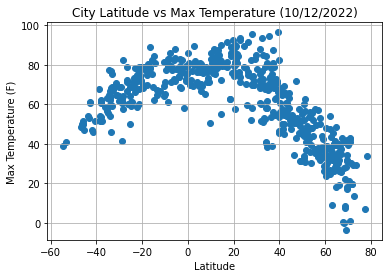

This plot shows the maximum temperatures of the cities based on their latitude. This reveals that places located near the equator are generally warmer and temperatures drop the farther you get.


In [10]:
plt.scatter(x,y_temp)
plt.grid()
plt.title("City Latitude vs Max Temperature (10/12/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save figure
plt.savefig(f"../output_data/Figure_1")

#show plot
plt.show()
print("This plot shows the maximum temperatures of the cities based on their latitude. This reveals that places located near the equator are generally warmer and temperatures drop the farther you get.")

## Latitude vs. Humidity Plot

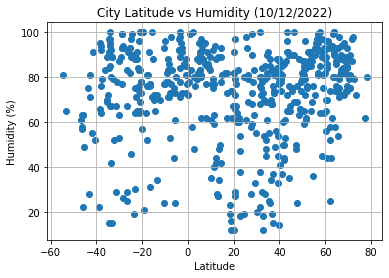

This plot shows the maximuim humidity levels of the cities based off their latitude.


In [11]:
plt.scatter(x,y_humidity)
plt.grid()
plt.title("City Latitude vs Humidity (10/12/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save figure
plt.savefig(f"../output_data/Figure_2")

#show plot
plt.show()

print("This plot shows the maximuim humidity levels of the cities based off their latitude.")

## Latitude vs. Cloudiness Plot

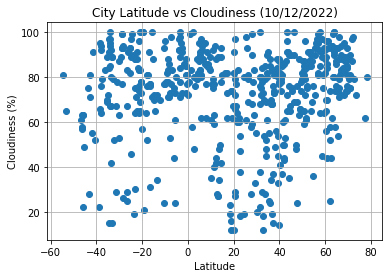

This plot shows the cities' levels of cloudiness based off latitude.


In [12]:
plt.scatter(x,y_humidity)
plt.grid()
plt.title("City Latitude vs Cloudiness (10/12/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save figure
plt.savefig(f"../output_data/Figure_3")

#show plot
plt.show()

print("This plot shows the cities' levels of cloudiness based off latitude.")

## Latitude vs. Wind Speed Plot

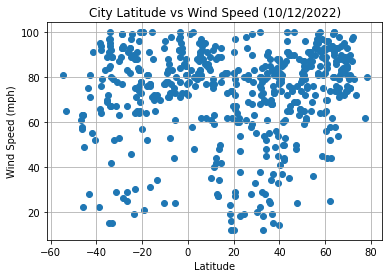

This plot shows the cities' levels of wind speed based off latitude.


In [13]:
plt.scatter(x,y_humidity)
plt.grid()
plt.title("City Latitude vs Wind Speed (10/12/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save figure
plt.savefig(f"../output_data/Figure_4")

#show plot
plt.show()

print("This plot shows the cities' levels of wind speed based off latitude.")

## Linear Regression

In [86]:
#create dataframes for north and south hempishere
northern = cities_df[cities_df["Lat"] > 0]
southern = cities_df[cities_df["Lat"] < 0]

#setting up linear regression function
def plot_regression_line(x_values, y_values, title, y_label, textcoord, i):

    #set up linregress 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #set up plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    print(f"The r-value is: {rvalue**2}")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(line_eq, xy= textcoord, fontsize = 15, color = "red")
    plt.savefig(f"../output_data/Regress_figure{i}.png")
    plt.show()
       

    

In [87]:
n_lat = northern["Lat"]
n_temp = northern["Max Temp"]
n_humidity = northern["Humidity"]
n_cloudiness = northern["Cloudiness"]
n_wind = northern["Wind Speed"]

s_lat = southern["Lat"]
s_temp = southern["Max Temp"]
s_humidity = southern["Humidity"]
s_cloudiness = southern["Cloudiness"]
s_wind = southern["Wind Speed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7134146221302343


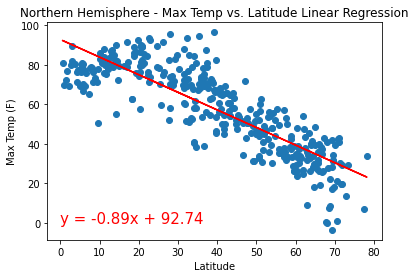

This regression line displays a negative correlation between latitude and temperature.
As latitude increases in number (city is farther from equator), temperature decreases.


In [88]:
x_values = n_lat
y_values = n_temp
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
y_label = "Max Temp (F)"
textcoord = (0,0)
plot_regression_line(x_values, y_values, title, y_label, textcoord, 1)
print("This regression line displays a negative correlation between latitude and temperature.")
print("As latitude increases in number (city is farther from equator), temperature decreases.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5556725968817535


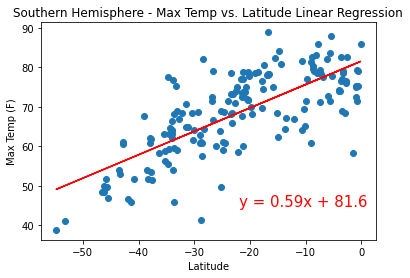

This regression line displays a positive correlation between latitude and temperature.
As latitude decreaes in number (city is closer to equator), temperature increases.


In [89]:
x_values = s_lat
y_values = s_temp
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
y_label = "Max Temp (F)"
textcoord = (-22,45)
plot_regression_line(x_values, y_values, title, y_label, textcoord, 2)
print("This regression line displays a positive correlation between latitude and temperature.")
print("As latitude decreaes in number (city is closer to equator), temperature increases.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04243344255307361


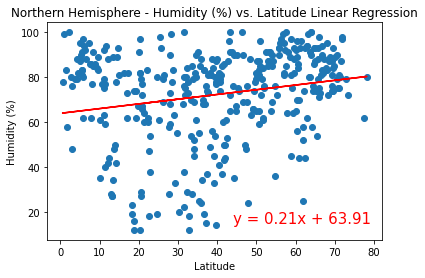

This regression line does not display a strong correlation between latitude and humidity levels.


In [90]:
x_values = n_lat
y_values = n_humidity
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
y_label = "Humidity (%)"
textcoord = (44,15)
plot_regression_line(x_values, y_values, title, y_label, textcoord, 3)
print("This regression line does not display a strong correlation between latitude and humidity levels.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.034218819979785466


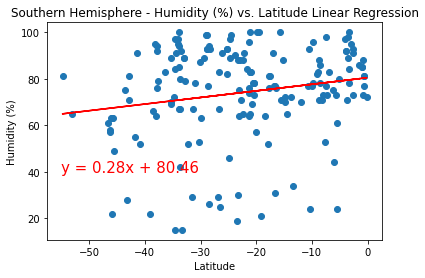

This regression line does not display a strong correlation between latitude and humidity levels.


In [91]:
x_values = s_lat
y_values = s_humidity
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
y_label = "Humidity (%)"
textcoord = (-55,40)
plot_regression_line(x_values, y_values, title, y_label, textcoord, 4)
print("This regression line does not display a strong correlation between latitude and humidity levels.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01451809113355707


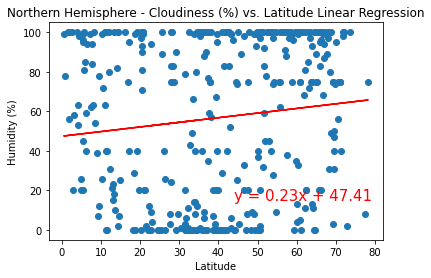

This regression line does not display a strong correlation between latitude and cloudiness.


In [92]:
x_values = n_lat
y_values = n_cloudiness
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
y_label = "Humidity (%)"
textcoord = (44,15)
plot_regression_line(x_values, y_values, title, y_label, textcoord, 5)
print("This regression line does not display a strong correlation between latitude and cloudiness.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002397217406107383


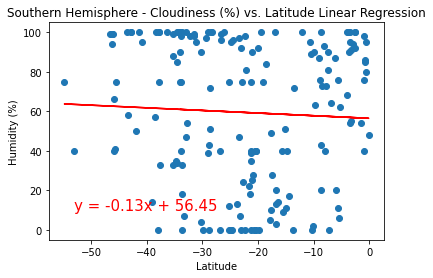

This regression line does not display a strong correlation between latitude and cloudiness.


In [93]:
x_values = s_lat
y_values = s_cloudiness
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
y_label = "Humidity (%)"
textcoord = (-53,10)
plot_regression_line(x_values, y_values, title, y_label, textcoord, 6)
print("This regression line does not display a strong correlation between latitude and cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.006434462886562314


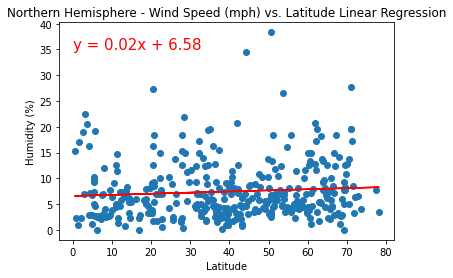

This regression line does not display a strong correlation between latitude and wind speed.


In [94]:
x_values = n_lat
y_values = n_wind
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
y_label = "Humidity (%)"
textcoord = (0,35)
plot_regression_line(x_values, y_values, title, y_label, textcoord, 7)
print("This regression line does not display a strong correlation between latitude and wind speed.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.035129688790230075


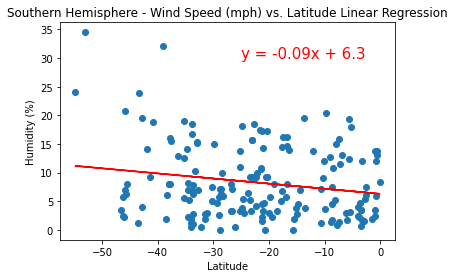

This regression line does not display a strong correlation between latitude and wind speed.


In [95]:
x_values = s_lat
y_values = s_wind
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
y_label = "Humidity (%)"
textcoord = (-25,30)
plot_regression_line(x_values, y_values, title, y_label, textcoord, 8)
print("This regression line does not display a strong correlation between latitude and wind speed.")